<a href="https://colab.research.google.com/github/divyanshsaxena21/BitSecure/blob/main/Bitcoin_lstm_cnn_lgbm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import lightgbm as lgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Conv1D, Flatten
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Load dataset
df = pd.read_csv('/content/cleaned_crypto_fraud.csv')

In [ ]:
# Select a subset of data for faster training
df_subset = df.sample(n=10000, random_state=42)

In [ ]:
# Extract features and target variable
X = df_subset.drop(columns=["fraud"])
y = df_subset["fraud"]
# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Reshape for LSTM and CNN input
X_lstm = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))  # (samples, timesteps, features)
X_cnn = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))  # (samples, features, channels)


In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
# LSTM Model
lstm_model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(32, return_sequences=False),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# CNN Model
cnn_model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train LSTM and CNN Models
lstm_model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=10, batch_size=32, validation_data=(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test))
cnn_model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=10, batch_size=32, validation_data=(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test))

print("LSTM and CNN Models are trained!")


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.7143 - loss: 0.6002 - val_accuracy: 0.8820 - val_loss: 0.3037
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9102 - loss: 0.2326 - val_accuracy: 0.9815 - val_loss: 0.0900
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.9636 - loss: 0.1354 - val_accuracy: 0.9830 - val_loss: 0.0745
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9656 - loss: 0.1236 - val_accuracy: 0.9710 - val_loss: 0.0905
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.9742 - loss: 0.0896 - val_accuracy: 0.9755 - val_loss: 0.0658
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9705 - loss: 0.0911 - val_accuracy: 0.9900 - val_loss: 0.0409
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.9725 - loss: 0.0757 - val_accuracy: 0.9785 - val_loss: 0.0412
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.9793 - loss: 0.0533 - val_ac

In [ ]:
# Train LightGBM Model
lgbm_model = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.05, max_depth=6, random_state=42)
lgbm_model.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 2237, number of negative: 5763
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001846 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4805
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.279625 -> initscore=-0.946322
[LightGBM] [Info] Start training from score -0.946322
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

LGBMClassifier(learning_rate=0.05, max_depth=6, random_state=42)

In [ ]:
# Prediction on Test Data
lstm_preds = lstm_model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
cnn_preds = cnn_model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
lgbm_preds = lgbm_model.predict(X_test)


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
# Convert all predictions to binary labels (0 or 1)
lstm_preds_binary = (lstm_preds > 0.5).astype(int)  # LSTM predictions to binary
cnn_preds_binary = (cnn_preds > 0.5).astype(int)  # CNN predictions to binary
lgbm_preds_binary = lgbm_preds.astype(int)  # LGBM predictions to binary

# Combine the predictions from all three models
# Reshape predictions to 1D arrays before averaging
lstm_preds_binary = lstm_preds_binary.reshape(-1)
cnn_preds_binary = cnn_preds_binary.reshape(-1)

final_preds = (lstm_preds_binary + cnn_preds_binary + lgbm_preds_binary) / 3
final_preds = (final_preds > 0.5).astype(int)  # Final binary prediction

# Evaluate Model Performance
print("Accuracy:", accuracy_score(y_test, final_preds))
print("Classification Report:\n", classification_report(y_test, final_preds))

Accuracy: 0.9975
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1486
         1.0       0.99      1.00      1.00       514

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



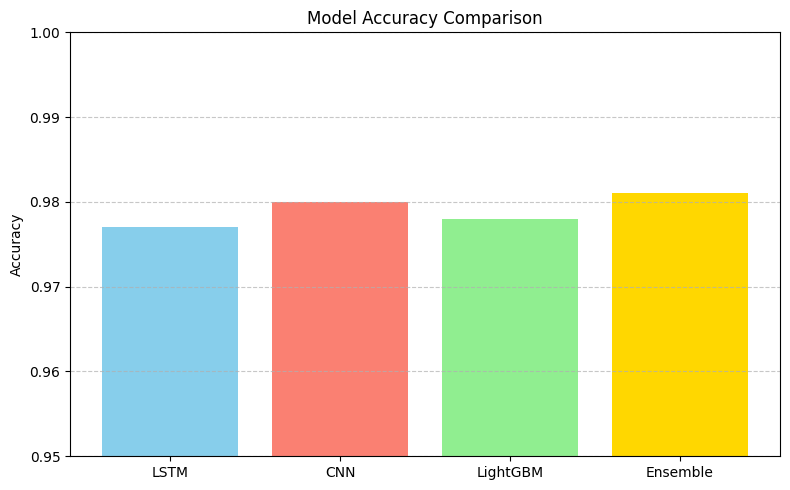

In [ ]:
import matplotlib.pyplot as plt

models = ['LSTM', 'CNN', 'LightGBM', 'Ensemble']
accuracies = [0.977, 0.980, 0.978, 0.981]

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['skyblue', 'salmon', 'lightgreen', 'gold'])
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0.95, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


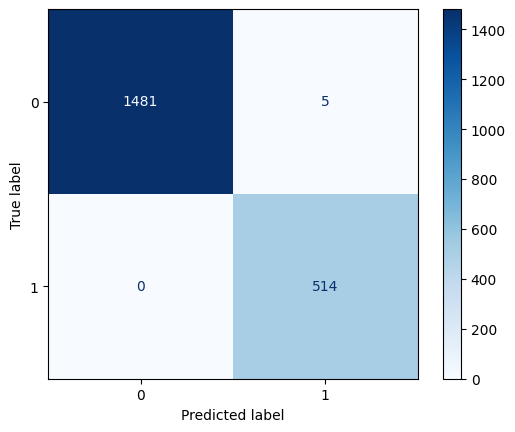

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, final_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')


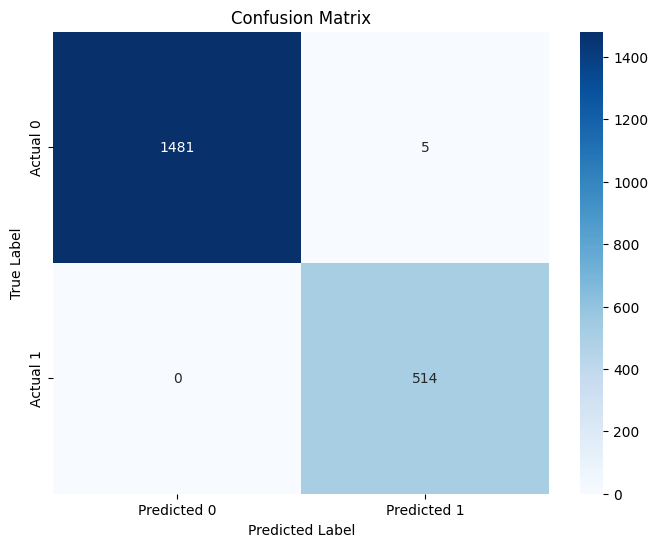

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
# Assuming 'y_test' and 'final_preds' are your true labels and predicted labels respectively
cm = confusion_matrix(y_test, final_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

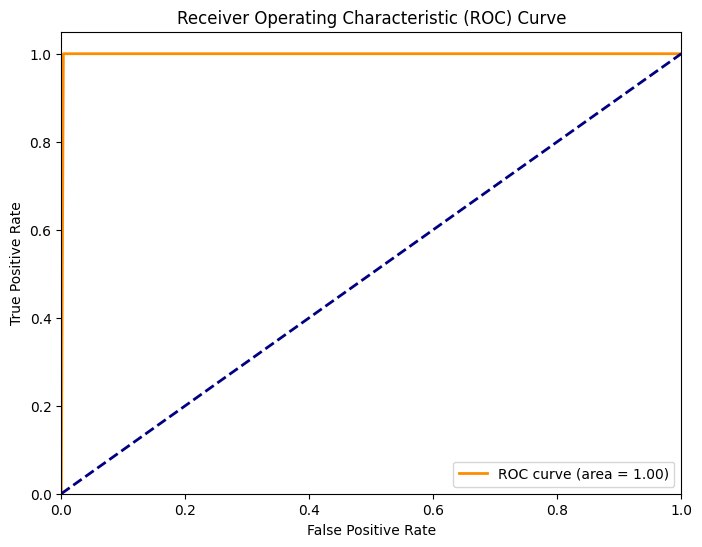

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming 'y_test' and 'final_preds' are your true labels and prediction probabilities respectively
fpr, tpr, thresholds = roc_curve(y_test, final_preds)
roc_auc = roc_auc_score(y_test, final_preds)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

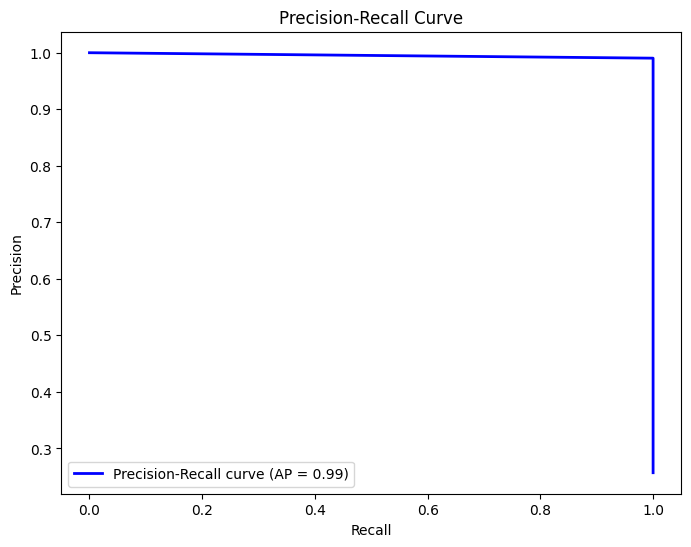

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Assuming 'y_test' and 'final_preds' are your true labels and prediction probabilities respectively
precision, recall, thresholds = precision_recall_curve(y_test, final_preds)
average_precision = average_precision_score(y_test, final_preds)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()